The libraries

In [2]:
# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Importing data

In [5]:
# load a data file
# note the relative filepath! where is this file located?
gdf = gpd.read_file('acs2020_5yr_B03002_14000US06037463000.geojson')

#  Preliminary inspection

A quick look at the size of the data.

In [6]:
# get number of rows, columns
gdf.shape

(2499, 45)

In [7]:
# get first 5 rows
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10040682.0,0.0,5189338.0,0.0,2603280.0,2899.0,779166.0,3477.0,...,529.0,2075359.0,16947.0,470323.0,9898.0,387116.0,9699.0,83207.0,3161.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [8]:
# get a random row
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1705,14000US06037533501,"Census Tract 5335.01, Los Angeles, CA",3077.0,533.0,1.0,3.0,1.0,3.0,0.0,13.0,...,13.0,1428.0,337.0,326.0,361.0,326.0,361.0,0.0,13.0,"MULTIPOLYGON (((-118.20416 33.98906, -118.2040..."


<AxesSubplot:>

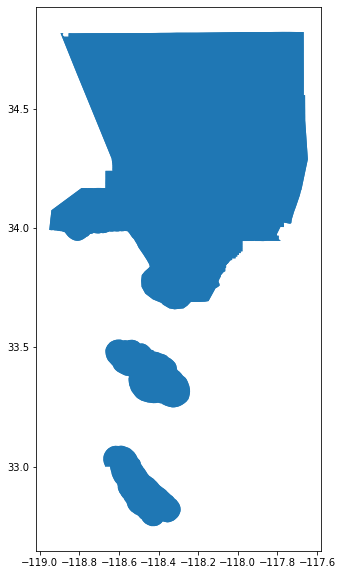

In [15]:
# plot it!
gdf.plot(figsize=(10,10))

<AxesSubplot:>

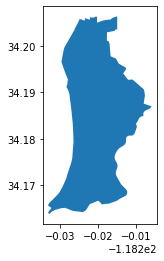

In [16]:
# plot a random row
gdf.sample().plot()

 # Data types

To get the data types, we will use .info().

In [11]:
# look at columns, null values, and the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2499 non-null   object  
 1   name              2499 non-null   object  
 2   B03002001         2499 non-null   float64 
 3   B03002001, Error  2499 non-null   float64 
 4   B03002002         2499 non-null   float64 
 5   B03002002, Error  2499 non-null   float64 
 6   B03002003         2499 non-null   float64 
 7   B03002003, Error  2499 non-null   float64 
 8   B03002004         2499 non-null   float64 
 9   B03002004, Error  2499 non-null   float64 
 10  B03002005         2499 non-null   float64 
 11  B03002005, Error  2499 non-null   float64 
 12  B03002006         2499 non-null   float64 
 13  B03002006, Error  2499 non-null   float64 
 14  B03002007         2499 non-null   float64 
 15  B03002007, Error  2499 non-null   float64 
 16  B03002008       

The FIPS code

What is the geoid? It is called a FIPS code but why is it important?

https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html


In [19]:
#''' FIPS CODE: 01     234     567890      1
#             state   country   tract     block grp'''

In [20]:
# get first five geoid's
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101220
4    14000US06037101221
Name: geoid, dtype: object

#  Delete county row


As we have observed, the first row in the data obtained from censusreporter is for the entire county. Keeping this row is problematic, as it represents a data record that is at a different scale. Let's delete it.

In [22]:
#Note that any data downloaded from censusreporter will have a "summary row" for the entire data. 
# check the data again
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10040682.0,0.0,5189338.0,0.0,2603280.0,2899.0,779166.0,3477.0,...,529.0,2075359.0,16947.0,470323.0,9898.0,387116.0,9699.0,83207.0,3161.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [23]:
# drop the row with index 0 (i.e. the first row)
gdf = gdf.drop([0])

In [24]:
# check to see if it has been deleted
gdf.head()


,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",2717.0,442.0,1535.0,361.0,1466.0,381.0,4.0,14.0,...,13.0,290.0,332.0,29.0,59.0,0.0,13.0,29.0,59.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


#  The census data dictionary

There are a lot of columns. What are these columns? Column headers are defined in the metadata.json file that comes in the dowloaded zipfile from censusreporter. Click the link below to open the json file in another tab.

'metadata.json'

Let's identify which columns are needed, and which are not for our exploration.

In [28]:
### Dropping columns ###

# There are many columns that we do not need.

# output existing columns as a list
# create a list of columns to keep
# redefine gdf with only the columns to keep



In [29]:
list(gdf) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [30]:
# create a list of columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [31]:
# redefine gdf with only columns to keep
gdf = gdf[columns_to_keep]

In [32]:
# check the slimmed down gdf
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,2960.0,2393.0,17.0,2.0,406.0,3.0,9.0,130.0,963.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,3937.0,3159.0,148.0,0.0,426.0,0.0,0.0,204.0,182.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,2254.0,1659.0,94.0,0.0,390.0,0.0,6.0,105.0,1521.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,2605.0,2026.0,213.0,0.0,267.0,0.0,99.0,0.0,1182.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",2717.0,1535.0,1466.0,4.0,0.0,65.0,0.0,0.0,0.0,1182.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


#  Renaming columns

Let's rename the columns. First, create a list of column names as they are now.

In [33]:
list(gdf) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

Then, simply copy and paste the output list above, and define the columns with it. Replace the values with your desired column names

In [35]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [36]:
# check the renamed columns
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,2960.0,2393.0,17.0,2.0,406.0,3.0,9.0,130.0,963.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,3937.0,3159.0,148.0,0.0,426.0,0.0,0.0,204.0,182.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,2254.0,1659.0,94.0,0.0,390.0,0.0,6.0,105.0,1521.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,2605.0,2026.0,213.0,0.0,267.0,0.0,99.0,0.0,1182.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",2717.0,1535.0,1466.0,4.0,0.0,65.0,0.0,0.0,0.0,1182.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


 #  Double check your data integrity

Does the math add up? Let's check. The Total should equal the rest of the columns.

In [37]:
# get a random record
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
657,14000US06037211804,"Census Tract 2118.04, Los Angeles, CA",3110.0,2302.0,221.0,120.0,43.0,1856.0,0.0,0.0,62.0,808.0,"MULTIPOLYGON (((-118.30911 34.06896, -118.3079..."


To get values from individual cells in a dataframe, use the iloc command.

In [38]:
# example usage of iloc to get the total population of our random record
# "for the 0th record, get the value in the Total column"
random_tract.iloc[0]['Total']

3110.0

In [39]:
# print this out in plain english
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 3110.0


In [40]:
# non hispanic plus hispanic should equal to the total
print('Non Hispanic + Hispanic: ' + str(random_tract.iloc[0]['Non Hispanic'] + random_tract.iloc[0]['Hispanic']))

Non Hispanic + Hispanic: 3110.0


In [41]:
# hispanic plus all the non hispanice categories
print(random_tract.iloc[0]['Non Hispanic White'] + 
      random_tract.iloc[0]['Non Hispanic Black'] + 
      random_tract.iloc[0]['Non Hispanic American Indian and Alaska Native'] + 
      random_tract.iloc[0]['Non Hispanic Asian'] + 
      random_tract.iloc[0]['Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      random_tract.iloc[0]['Non Hispanic Some other race'] + 
      random_tract.iloc[0]['Non Hispanic Two or more races'] + 
      random_tract.iloc[0]['Hispanic'])

3110.0


#  Simple stats and plots

In [42]:
# access a single column like df['col_name']
gdf['Total'].head()

1    3923.0
2    4119.0
3    3775.0
4    3787.0
5    2717.0
Name: Total, dtype: float64

In [43]:
# What is the mean?
gdf['Total'].mean()

4019.48839071257

In [44]:
# What is the median?
gdf['Total'].median()


3950.5

In [45]:
# get some stats
gdf['Total'].describe()

count     2498.000000
mean      4019.488391
std       1441.161147
min          0.000000
25%       3028.000000
50%       3950.500000
75%       4951.000000
max      12957.000000
Name: Total, dtype: float64

#  Create your first plot


https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<AxesSubplot:ylabel='Frequency'>

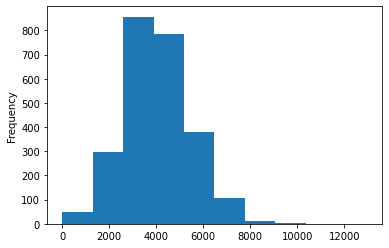

In [46]:
# plot it as a historgram with 50 bins
gdf['Total'].plot.hist()

<AxesSubplot:title={'center':'Los Angeles County census tracts by population size (ACS 2019 5-year)'}, ylabel='Frequency'>

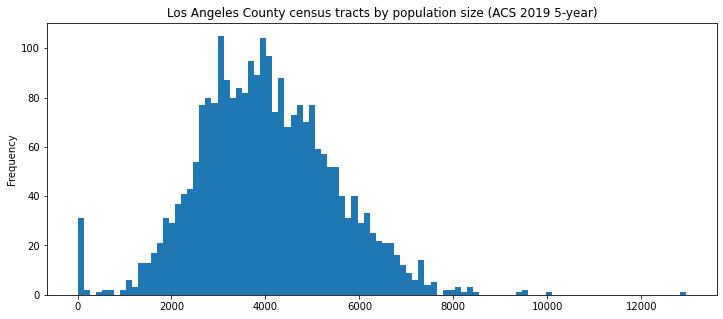

In [47]:
# make it bigger, increase the number of bins, and give it a title
gdf['Total'].plot.hist(figsize=(12,5),
                       bins=100,
                       title='Los Angeles County census tracts by population size (ACS 2019 5-year)')

# Sorting

What are the top 10 most populated census tracts? What are the census tracts with the highest black popluation? To answer these questions, the simplest method is to sort the data by their respective columns.

pandas.DataFrame.sort_values.html

In [48]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [49]:
# display the data, but just a few columns to keep it clean
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
939,14000US06037265301,12957.0
2279,14000US06037702900,10065.0
1029,14000US06037275604,9559.0
581,14000US06037206020,9476.0
2439,14000US06037920121,9385.0
1605,14000US06037502303,8506.0
2407,14000US06037920028,8400.0
2400,14000US06037911100,8380.0
1208,14000US06037401707,8333.0
1320,14000US06037406903,8251.0


<AxesSubplot:>

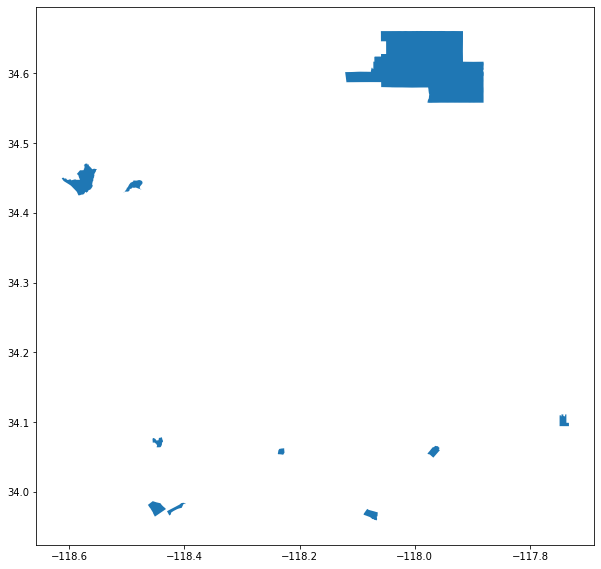

In [50]:
# plot the top 10 most populated tracts
gdf_sorted.head(10).plot(figsize=(10,10))


<AxesSubplot:>

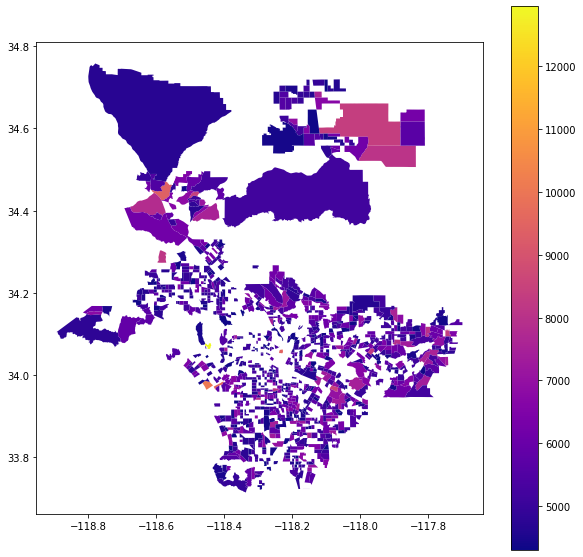

In [51]:
# Make it 100 and prettier
gdf_sorted.head(1000).plot(figsize=(10,10),
                          column='Total', 
                          cmap='plasma', 
                          legend=True)

# Filtering and subsetting data

Sorting is one method, but the process of discovery compels us to interrogate the data in different ways. One method of doing so is to query, or filter the data to see specific views of the data based on a question you may have. For example, what are the census tract that have no people in them? Or, Which census tracts are more than 75% black?

In [52]:
# subset the data so that we can see the data per row... 
# in other words, this syntax is asking to "show me the values in my dataframe that match this filter
gdf[gdf['Total']==0]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
2460,14000US06037980001,"Census Tract 9800.01, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.37031 34.20120, -118.3658..."
2461,14000US06037980002,"Census Tract 9800.02, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
2462,14000US06037980003,"Census Tract 9800.03, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.14019 34.78468, -118.1401..."
2463,14000US06037980004,"Census Tract 9800.04, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.12795 34.64587, -118.1274..."
2464,14000US06037980005,"Census Tract 9800.05, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.35210 33.85818, -118.3517..."
2465,14000US06037980006,"Census Tract 9800.06, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.09420 33.78670, -118.0941..."
2466,14000US06037980007,"Census Tract 9800.07, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.11512 33.76305, -118.1135..."
2472,14000US06037980013,"Census Tract 9800.13, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.39627 33.92804, -118.3962..."
2477,14000US06037980018,"Census Tract 9800.18, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.18066 33.80597, -118.1806..."
2479,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.34414 34.21615, -118.3441..."


Note that unless you specify the resulting output as a new variable, the results are only temporary (in memory). If you want to use the results for subsequent analysis, you need to create a new variable.

In [53]:
# create a new variable for census tracts with zero pop
gdf_no_pop = gdf[gdf['Total']==0]

In [54]:
# how many records?
print('There are ' + str(len(gdf_no_pop)) + ' census tracts with no people in them')

There are 20 census tracts with no people in them


In [55]:
# display it
gdf_no_pop[['geoid','Total']]

,geoid,Total
2460,14000US06037980001,0.0
2461,14000US06037980002,0.0
2462,14000US06037980003,0.0
2463,14000US06037980004,0.0
2464,14000US06037980005,0.0
2465,14000US06037980006,0.0
2466,14000US06037980007,0.0
2472,14000US06037980013,0.0
2477,14000US06037980018,0.0
2479,14000US06037980020,0.0
